In [54]:
import pandas as pd
import glob
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

path = '/Users/zeyku390/PycharmProjects/H.inflata/jupyter/data/*.csv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split("_annot")[0]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot= {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header="infer")

In [55]:
dic_annot["carpe"]

,id,desc
0,KAG9389427.1,KAG9389427.1 Chromosome partition protein Smc ...
1,KAG9389428.1,KAG9389428.1 hypothetical protein J8273_8715 [...
2,KAG9389429.1,KAG9389429.1 Chromo (CHRromatin Organization M...
3,KAG9389430.1,KAG9389430.1 Endonuclease/Exonuclease/phosphat...
4,KAG9389431.1,KAG9389431.1 hypothetical protein J8273_8721 [...
...,...,...
8267,KAG9397694.1,KAG9397694.1 hypothetical protein J8273_0825 [...
8268,KAG9397695.1,KAG9397695.1 hypothetical protein J8273_0826 [...
8269,KAG9397696.1,KAG9397696.1 hypothetical protein J8273_0827 [...
8270,KAG9397697.1,KAG9397697.1 hypothetical protein J8273_0828 [...


In [56]:
def anti_join(x, y):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    #ans= ans.reset_index()
    return ans

dic_hypo={}
dic_func={}
dic_upset={}
for sp, df in dic_annot.items():
    dic_hypo[sp]= df[df["desc"].str.contains("hypothetical|unknown", case=False)]
    dic_hypo[sp]["type"] = "hypothetical"

    dic_func[sp]= anti_join(dic_annot[sp], dic_hypo[sp])
    dic_func[sp]["type"] = "functional"

    dic_upset[sp]=pd.concat([dic_hypo[sp], dic_func[sp]], axis=0)
    dic_upset[sp]["sp"] = sp

df_upset = pd. concat([dic_upset["HIN"], dic_upset["spiro"], dic_upset["trepo"], dic_upset["wb"], dic_upset["muris"], dic_upset["kbiala"], dic_upset["carpe"]], axis=0)

/var/folders/8n/zyrpvfx12rj9yl61hl0wtpt00000gn/T/ipykernel_85811/1448886923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_hypo[sp]["type"] = "hypothetical"
/var/folders/8n/zyrpvfx12rj9yl61hl0wtpt00000gn/T/ipykernel_85811/1448886923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_hypo[sp]["type"] = "hypothetical"
/var/folders/8n/zyrpvfx12rj9yl61hl0wtpt00000gn/T/ipykernel_85811/1448886923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [57]:
df_upset_bl=df_upset.set_index(df_upset.sp == "HIN" ).set_index(df_upset.sp == "trepo", append=True).set_index(df_upset.sp == "spiro", append=True).set_index(df_upset.sp == "wb", append=True).set_index(df_upset.sp == "muris", append=True).set_index(df_upset.sp == "kbiala", append=True).set_index(df_upset.sp == "carpe", append=True)
df_upset_bl= df_upset_bl.rename_axis(["HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe"])
df_upset_bl


id  \
HIN   trepo spiro wb    muris kbiala carpe                 
True  False False False False False  False    HIN_000001   
                                     False    HIN_000003   
                                     False    HIN_000004   
                                     False    HIN_000005   
                                     False    HIN_000006   
...                                                  ...   
False False False False False False  True   KAG9397686.1   
                                     True   KAG9397687.1   
                                     True   KAG9397691.1   
                                     True   KAG9397692.1   
                                     True   KAG9397698.1   

                                                                                         desc  \
HIN   trepo spiro wb    muris kbiala carpe                                                      
True  False False False False False  False                    HIN_000001 Hypothetical protein   
                                     False                    HIN_000003 Hypothetical protein   
                                     False                    HIN_000004 Hypothetical protein   
                                     False                    HIN_000005 Hypothetical protein   
                                     False          HIN_000006 Conserved hypothetical protein   
...                                                                                       ...   
False False False False False False  True   KAG9397686.1 DEAD/DEAH box helicase [Carpediem...   
                                     True   KAG9397687.1 Zinc-binding dehydrogenase [Carpe...   
                                     True   KAG9397691.1 FG-GAP repeat [Carpediemonas memb...   
                                     True   KAG9397692.1 STRUCTURAL MAINTENANCE OF CHROMOS...   
                                     True   KAG9397698.1 Zinc knuckle [Carpediemonas membr...   

                                                    type     sp  
HIN   trepo spiro wb    muris kbiala carpe                       
True  False False False False False  False  hypothetical    HIN  
                                     False  hypothetical    HIN  
                                     False  hypothetical    HIN  
                                     False  hypothetical    HIN  
                                     False  hypothetical    HIN  
...                                                  ...    ...  
False False False False False False  True     functional  carpe  
                                     True     functional  carpe  
                                     True     functional  carpe  
                                     True     functional  carpe  
                                     True     functional  carpe  

[131146 rows x 4 columns]

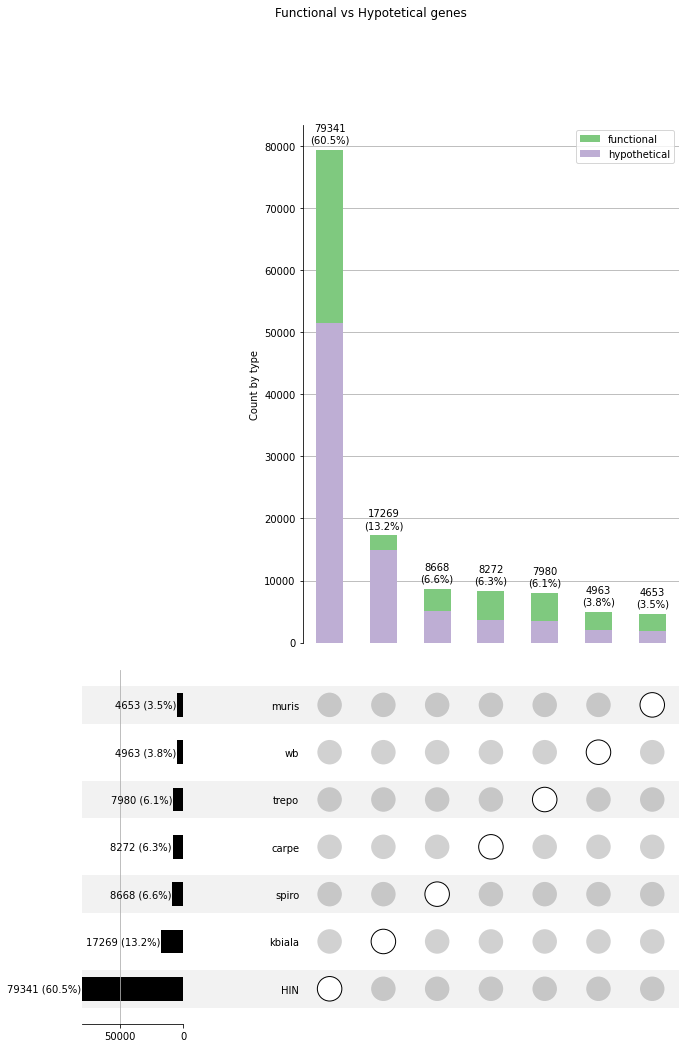

In [70]:
upset = UpSet(df_upset_bl,
              intersection_plot_elements=0,
              subset_size='count',
              show_counts=True,
               show_percentages=True,
              sort_categories_by="cardinality",
              sort_by="cardinality",
                    element_size=70)

upset.add_stacked_bars(by="type", colors=cm.Accent,
                       title="Count by type", elements=10)

upset.style_subsets(max_degree=1,
                    facecolor="white",
                    edgecolor="black",
                    hatch=10)


upset.plot()
plt.suptitle("Functional vs Hypotetical genes")
plt.show()

In [71]:
dic_upset["kbiala"]

,id,desc,type,sp
0,GCA61943.1,GCA61943.1 hypothetical protein KIPB_000005 [K...,hypothetical,kbiala
2,GCA61945.1,GCA61945.1 hypothetical protein KIPB_000014 [K...,hypothetical,kbiala
3,GCA61946.1,"GCA61946.1 hypothetical protein KIPB_000040, p...",hypothetical,kbiala
4,GCA61947.1,GCA61947.1 hypothetical protein KIPB_000049 [K...,hypothetical,kbiala
5,GCA61948.1,GCA61948.1 hypothetical protein KIPB_000050 [K...,hypothetical,kbiala
...,...,...,...,...
17145,GIQ93007.1,"GIQ93007.1 ribosomal protein L7A/L8, partial [...",functional,kbiala
17151,GIQ93013.1,"GIQ93013.1 cyclin PHO80-like protein, partial ...",functional,kbiala
17162,GIQ93024.1,"GIQ93024.1 dynein heavy chain, partial [Kipfer...",functional,kbiala
17209,GIQ93071.1,GIQ93071.1 sodium-dependent phosphate transpor...,functional,kbiala
